In [1]:
import numpy as np
import pandas as pd

from pandas import option_context
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

from load_datasets import load_diabetes, load_breast_cancer, load_svmguide1, load_australian, load_mushrooms, load_a5a
#from models import LogisticRegression
from ml_utils import run_solvers, optim_data, run_bench, optim_bench, models_summary, diagnostic_epochs, diagnostic_time
#from solvers_utils import logistic, logistic_der, f_and_df

C:\Users\Utente\AppData\Local\Temp\ipykernel_12564\2308095027.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Diabetes

In [3]:
data_diab = load_diabetes()

X_train = (614, 9), y_train = (614,)
X_test = (154, 9), y_test = (154,)
Class distribution: {-1.0: 0.3469055374592834, 1.0: 0.6530944625407166}


In [4]:
CDiab = 1
MDiab = 8
kDiab = 200

## Benchmark

In [6]:
benchDiab = run_bench(data_diab, CDiab)

benchDiab_data = optim_bench(benchDiab)

## SGD

In [25]:
# SGD-Fixed
sgdfixed_diab = run_solvers("SGD-Fixed", CDiab, data_diab, kDiab, MDiab, (0.1, 0.01, 0.001))

In [14]:
# SGD-Decreasing
sgddecre_diab = run_solvers("SGD-Decreasing", CDiab, data_diab, kDiab, MDiab, (1, 0.1, 0.01))

In [15]:
# SGDM
sgdm_diab = run_solvers("SGDM", CDiab, data_diab, kDiab, MDiab, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [16]:
# SGD-Armijo
sgdarmijo_diab = run_solvers("SGD-Armijo", CDiab, data_diab, kDiab, MDiab, (1, 0.1, 0.01))

In [19]:
# MSL-SGDM-C
mslc_diab = run_solvers("MSL-SGDM-C", CDiab, data_diab, kDiab, MDiab, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [18]:
# MSL-SGDM-R
mslr_diab = run_solvers("MSL-SGDM-R", CDiab, data_diab, kDiab, MDiab, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [26]:
modelsDiab_data = optim_data(sgdfixed_diab + sgddecre_diab + sgdm_diab + sgdarmijo_diab + mslc_diab + mslr_diab)

## Summary

In [27]:
models_summary(modelsDiab_data, benchDiab_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train score,Test score,Distance (L-BFGS),Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.662128,0.000001,NaN,5,0.653094,0.642857,0.000000,0.193861
2,CG,1,NaN,NaN,NaN,0.662128,0.000003,NaN,6,0.653094,0.642857,0.000000,0.193861
0,L-BFGS,1,NaN,NaN,NaN,0.662128,0.000014,NaN,6,0.653094,0.642857,0.000000,0.193861
7,SGD-Decreasing,1,8.0,0.100,0.0,0.662128,0.000142,0.567728,200,0.653094,0.642857,0.000200,0.193965
13,SGD-Armijo,1,8.0,0.100,0.0,0.662128,0.000178,3.578526,200,0.653094,0.642857,0.000173,0.193880
5,SGD-Fixed,1,8.0,0.001,0.0,0.662128,0.000204,0.578060,200,0.653094,0.642857,0.000200,0.193976
14,SGD-Armijo,1,8.0,0.010,0.0,0.662128,0.000461,3.520326,200,0.653094,0.642857,0.000520,0.193871
18,MSL-SGDM-R,1,8.0,1.000,0.9,0.662129,0.001300,3.666764,200,0.653094,0.642857,0.001237,0.193450
12,SGD-Armijo,1,8.0,1.000,0.0,0.662129,0.001379,3.598141,200,0.653094,0.642857,0.001300,0.193861
11,SGDM,1,8.0,0.010,0.9,0.662129,0.001785,0.551349,200,0.653094,0.642857,0.001034,0.193073


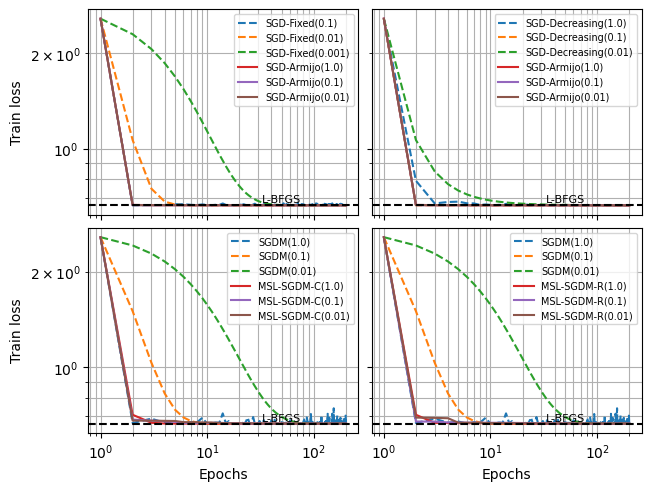

In [28]:
diagnostic_epochs(
    optim_data(sgdfixed_diab + sgdarmijo_diab),
    optim_data(sgddecre_diab + sgdarmijo_diab),
    optim_data(sgdm_diab + mslc_diab),
    optim_data(sgdm_diab + mslr_diab),
    benchDiab[0])

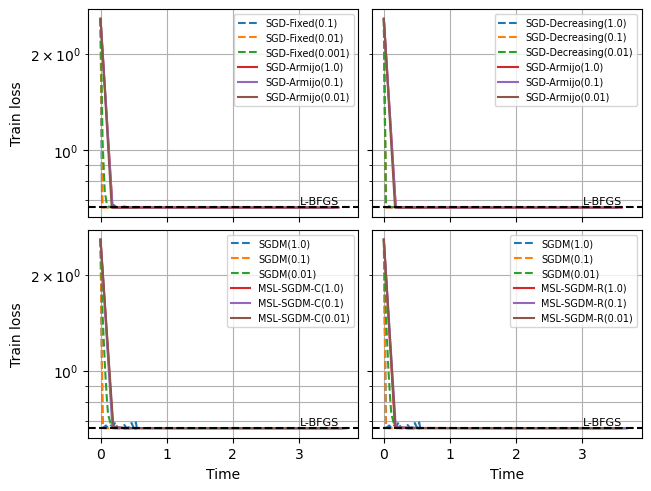

In [29]:
diagnostic_time(
    optim_data(sgdfixed_diab + sgdarmijo_diab),
    optim_data(sgddecre_diab + sgdarmijo_diab),
    optim_data(sgdm_diab + mslc_diab),
    optim_data(sgdm_diab + mslr_diab),
    benchDiab[0])

# Breast cancer

In [30]:
data_breast = load_breast_cancer()

X_train = (546, 11), y_train = (546,)
X_test = (137, 11), y_test = (137,)
Class distribution: {-1: 0.6684981684981685, 1: 0.3315018315018315}


In [31]:
CBreast = 1
MBreast = 8
kBreast = 200

## Benchmark

In [47]:
benchBreast = run_bench(data_breast, CBreast)

benchBreast_data = optim_bench(benchBreast)

## SGD

In [33]:
# SGD-Fixed
sgdfixed_breast = run_solvers("SGD-Fixed", CBreast, data_breast, kBreast, MBreast, (0.5, 0.1, 0.01))

In [34]:
# SGD-Decreasing
sgddecre_breast = run_solvers("SGD-Decreasing", CBreast, data_breast, kBreast, MBreast, (1, 0.1, 0.05))

In [35]:
# SGDM
sgdm_breast = run_solvers("SGDM", CBreast, data_breast, kBreast, MBreast, (0.5, 0.1, 0.01), (0.9, 0.9, 0.9))

In [36]:
# SGD-Armijo
sgdarmijo_breast = run_solvers("SGD-Armijo", CBreast, data_breast, kBreast, MBreast, (1, 0.5, 0.05))

In [37]:
# MSL-SGDM-C
mslc_breast = run_solvers("MSL-SGDM-C", CBreast, data_breast, kBreast, MBreast, (1, 0.5, 0.05), (0.9, 0.9, 0.9))

In [38]:
# MSL-SGDM-R
mslr_breast = run_solvers("MSL-SGDM-R", CBreast, data_breast, kBreast, MBreast, (1, 0.5, 0.05), (0.9, 0.9, 0.9))

In [39]:
modelsBreast_data = optim_data(sgdfixed_breast + sgddecre_breast + sgdm_breast + sgdarmijo_breast + mslc_breast + mslr_breast)

## Summary

In [48]:
models_summary(modelsBreast_data, benchBreast_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train score,Test score,Distance (L-BFGS),Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.492561,6.070183e-07,NaN,7,0.902930,0.817518,0.000000,0.447463
2,CG,1,NaN,NaN,NaN,0.492561,2.108349e-06,NaN,8,0.902930,0.817518,0.000000,0.447463
0,L-BFGS,1,NaN,NaN,NaN,0.492561,2.781037e-06,NaN,7,0.902930,0.817518,0.000000,0.447463
8,SGD-Decreasing,1,8.0,0.05,0.0,0.492561,5.111323e-05,0.542252,200,0.902930,0.817518,0.000000,0.447463
7,SGD-Decreasing,1,8.0,0.10,0.0,0.492561,1.923749e-04,0.525513,200,0.902930,0.817518,0.000173,0.447564
12,SGD-Armijo,1,8.0,1.00,0.0,0.492562,1.504207e-03,3.165483,200,0.902930,0.817518,0.001446,0.447707
14,SGD-Armijo,1,8.0,0.05,0.0,0.492562,1.477416e-03,3.133849,200,0.902930,0.817518,0.001510,0.447512
11,SGDM,1,8.0,0.01,0.9,0.492562,1.906914e-03,0.526458,200,0.902930,0.817518,0.001852,0.447558
13,SGD-Armijo,1,8.0,0.50,0.0,0.492562,1.967403e-03,3.167476,200,0.902930,0.817518,0.002015,0.447636
18,MSL-SGDM-R,1,8.0,1.00,0.9,0.492565,3.153037e-03,3.243910,200,0.902930,0.817518,0.003191,0.447275


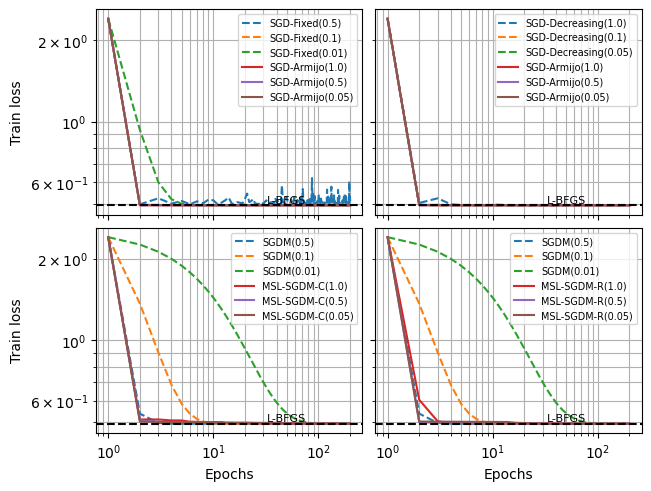

In [49]:
diagnostic_epochs(
    optim_data(sgdfixed_breast + sgdarmijo_breast),
    optim_data(sgddecre_breast + sgdarmijo_breast),
    optim_data(sgdm_breast + mslc_breast),
    optim_data(sgdm_breast + mslr_breast),
    benchBreast[0])

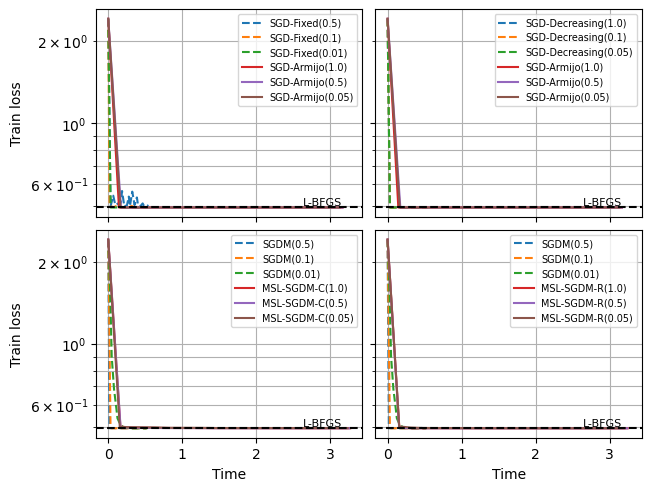

In [50]:
diagnostic_time(
    optim_data(sgdfixed_breast + sgdarmijo_breast),
    optim_data(sgddecre_breast + sgdarmijo_breast),
    optim_data(sgdm_breast + mslc_breast),
    optim_data(sgdm_breast + mslr_breast),
    benchBreast[0])

# svmguide1

In [51]:
data_svm = load_svmguide1()

X_train = (3089, 5), y_train = (3089,)
X_test = (4000, 5), y_test = (4000,)
Class distribution: {-1: 0.3525412754936873, 1: 0.6474587245063127}


In [52]:
Csvm = 1
Msvm = 16
ksvm = 200

## Benchmark

In [53]:
benchSvm = run_bench(data_svm, Csvm)

benchSvm_data = optim_bench(benchSvm)

## SGD

In [64]:
# SGD-Fixed
sgdfixed_svm = run_solvers("SGD-Fixed", Csvm, data_svm, ksvm, Msvm, (0.5, 0.1, 0.01))

In [55]:
# SGD-Decreasing
sgddecre_svm = run_solvers("SGD-Decreasing", Csvm, data_svm, ksvm, Msvm, (1, 0.1, 0.01))

In [57]:
# SGDM
sgdm_svm = run_solvers("SGDM", Csvm, data_svm, ksvm, Msvm, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [56]:
# SGD-Armijo
sgdarmijo_svm = run_solvers("SGD-Armijo", Csvm, data_svm, ksvm, Msvm, (1, 0.1, 0.01))

In [58]:
# MSL-SGDM-C
mslc_svm = run_solvers("MSL-SGDM-C", Csvm, data_svm, ksvm, Msvm, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [59]:
# MSL-SGDM-R
mslr_svm = run_solvers("MSL-SGDM-R", Csvm, data_svm, ksvm, Msvm, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [65]:
modelsSvm_data = optim_data(sgdfixed_svm + sgddecre_svm + sgdarmijo_svm + sgdm_svm + mslc_svm + mslr_svm)

## Summary

In [66]:
models_summary(modelsSvm_data, benchSvm_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train score,Test score,Distance (L-BFGS),Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.673302,3.544459e-07,NaN,5,0.653933,0.51675,0.000000,0.181772
2,CG,1,NaN,NaN,NaN,0.673302,8.300304e-06,NaN,8,0.653933,0.51675,0.000000,0.181772
0,L-BFGS,1,NaN,NaN,NaN,0.673302,1.321807e-05,NaN,5,0.653933,0.51625,0.000000,0.181772
8,SGD-Decreasing,1,16.0,0.01,0.0,0.673302,1.392248e-05,1.666015,200,0.653933,0.51675,0.000000,0.181772
11,SGD-Armijo,1,16.0,0.01,0.0,0.673302,2.125814e-05,25.445610,200,0.653933,0.51675,0.000100,0.181846
7,SGD-Decreasing,1,16.0,0.10,0.0,0.673302,6.433245e-05,1.675182,200,0.653933,0.51675,0.000000,0.181772
10,SGD-Armijo,1,16.0,0.10,0.0,0.673302,1.009360e-04,25.670409,200,0.653933,0.51675,0.000173,0.181772
14,SGDM,1,16.0,0.01,0.9,0.673302,2.397646e-04,1.601156,200,0.653933,0.51700,0.000245,0.181916
19,MSL-SGDM-R,1,16.0,0.10,0.9,0.673303,8.370016e-04,25.627934,200,0.653933,0.51600,0.000843,0.181728
9,SGD-Armijo,1,16.0,1.00,0.0,0.673303,9.361447e-04,25.843708,200,0.653933,0.51700,0.000954,0.181742


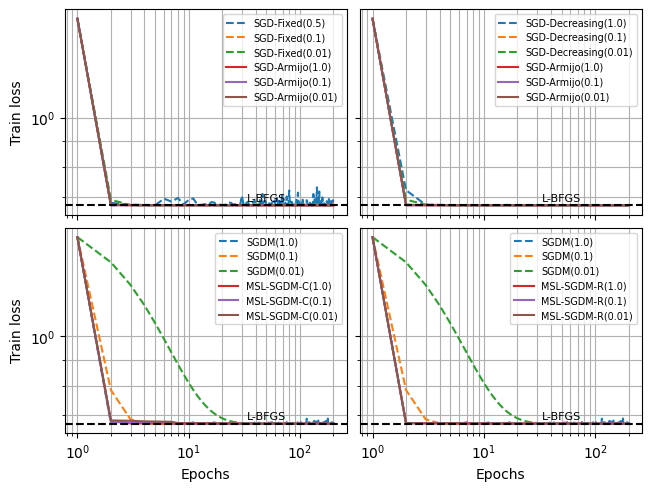

In [67]:
diagnostic_epochs(
    optim_data(sgdfixed_svm + sgdarmijo_svm),
    optim_data(sgddecre_svm + sgdarmijo_svm),
    optim_data(sgdm_svm + mslc_svm),
    optim_data(sgdm_svm + mslr_svm),
    benchSvm[0])

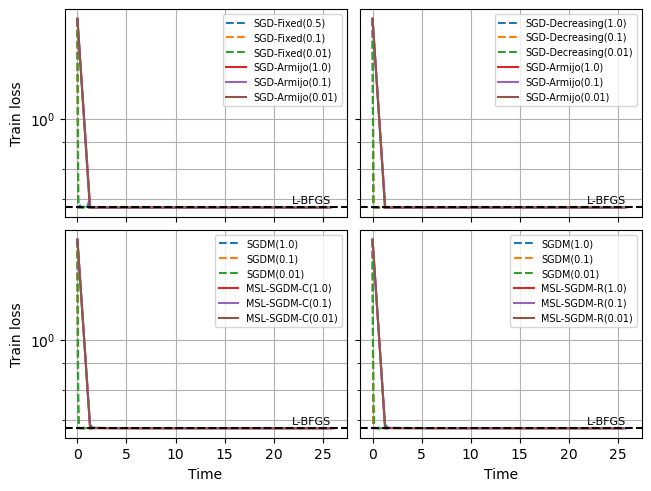

In [68]:
diagnostic_time(
    optim_data(sgdfixed_svm + sgdarmijo_svm),
    optim_data(sgddecre_svm + sgdarmijo_svm),
    optim_data(sgdm_svm + mslc_svm),
    optim_data(sgdm_svm + mslr_svm),
    benchSvm[0])

# Australian

In [70]:
data_austr = load_australian()

X_train = (552, 15), y_train = (552,)
X_test = (138, 15), y_test = (138,)
Class distribution: {-1.0: 0.5362318840579711, 1.0: 0.463768115942029}


In [71]:
CAustr = 1
MAustr = 8
kAustr = 200

## Benchmark

In [72]:
benchAustr = run_bench(data_austr, CAustr)

benchAustr_data = optim_bench(benchAustr)

## SGD

In [73]:
# SGD-Fixed
sgdfixed_austr = run_solvers("SGD-Fixed", CAustr, data_austr, kAustr, MAustr, (0.1, 0.01, 0.001))

In [74]:
# SGD-Decreasing
sgddecre_austr = run_solvers("SGD-Decreasing", CAustr, data_austr, kAustr, MAustr, (1, 0.1, 0.01))

In [75]:
# SGDM
sgdm_austr = run_solvers("SGDM", CAustr, data_austr, kAustr, MAustr, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [76]:
# SGD-Armijo
sgdarmijo_austr = run_solvers("SGD-Armijo", CAustr, data_austr, kAustr, MAustr, (1, 0.1, 0.01))

In [77]:
# MSL-SGDM-C
mslc_austr = run_solvers("MSL-SGDM-C", CAustr, data_austr, kAustr, MAustr, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [79]:
# MSL-SGDM-R
mslr_austr = run_solvers("MSL-SGDM-R", CAustr, data_austr, kAustr, MAustr, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [82]:
modelsAustr_data = optim_data(sgdfixed_austr + sgddecre_austr + sgdm_austr + sgdarmijo_austr + mslc_austr + mslr_austr)

## Summary

In [83]:
models_summary(modelsAustr_data, benchAustr_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train score,Test score,Distance (L-BFGS),Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.615582,0.000001,NaN,7,0.855072,0.876812,0.000000,0.335336
0,L-BFGS,1,NaN,NaN,NaN,0.615582,0.000004,NaN,7,0.855072,0.876812,0.000000,0.335336
2,CG,1,NaN,NaN,NaN,0.615582,0.000005,NaN,8,0.855072,0.876812,0.000000,0.335336
7,SGD-Decreasing,1,8.0,0.100,0.0,0.615582,0.000163,0.533060,200,0.855072,0.876812,0.000200,0.335333
5,SGD-Fixed,1,8.0,0.001,0.0,0.615582,0.000590,0.534926,200,0.855072,0.876812,0.000332,0.335391
11,SGDM,1,8.0,0.010,0.9,0.615584,0.002557,0.516642,200,0.851449,0.876812,0.001594,0.334941
12,SGD-Armijo,1,8.0,1.000,0.0,0.615588,0.003761,4.466579,200,0.851449,0.876812,0.003382,0.335408
13,SGD-Armijo,1,8.0,0.100,0.0,0.615590,0.004177,4.487556,200,0.855072,0.876812,0.004162,0.335148
10,SGDM,1,8.0,0.100,0.9,0.615591,0.004997,0.533953,200,0.851449,0.876812,0.003830,0.333690
6,SGD-Decreasing,1,8.0,1.000,0.0,0.615592,0.006478,0.539299,200,0.862319,0.876812,0.003285,0.335213


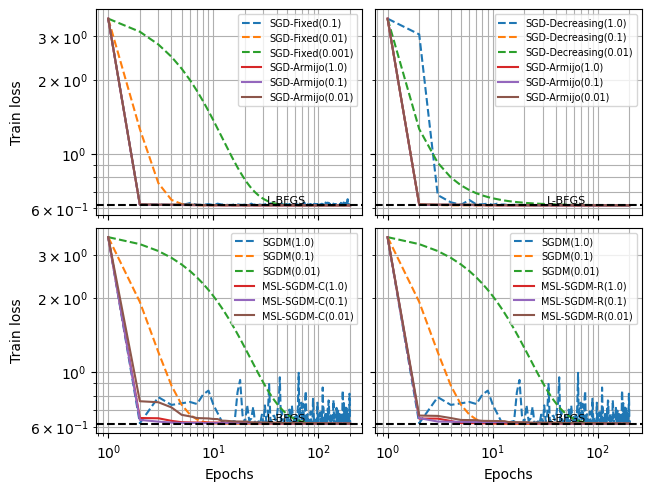

In [84]:
diagnostic_epochs(
    optim_data(sgdfixed_austr + sgdarmijo_austr),
    optim_data(sgddecre_austr + sgdarmijo_austr),
    optim_data(sgdm_austr + mslc_austr),
    optim_data(sgdm_austr + mslr_austr),
    benchAustr[0])

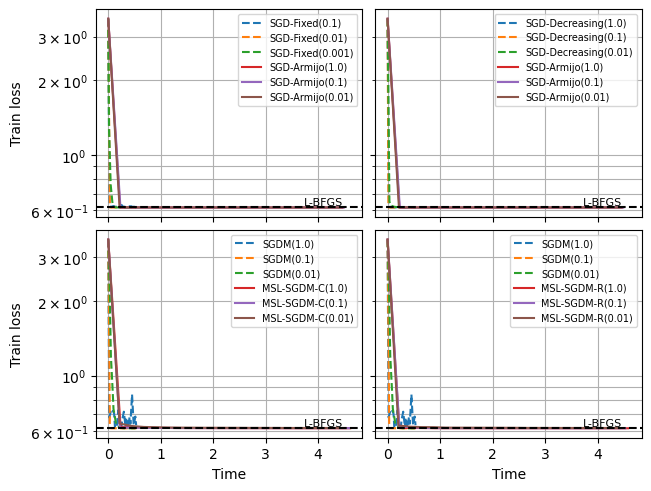

In [85]:
diagnostic_time(
    optim_data(sgdfixed_austr + sgdarmijo_austr),
    optim_data(sgddecre_austr + sgdarmijo_austr),
    optim_data(sgdm_austr + mslc_austr),
    optim_data(sgdm_austr + mslr_austr),
    benchAustr[0])

# Mushrooms

In [15]:
data_mush = load_mushrooms()

X_train = (6499, 113), y_train = (6499,)
X_test = (1625, 113), y_test = (1625,)
Class distribution: {-1: 0.48222803508232037, 1: 0.5177719649176796}


In [16]:
Cmush = 1
Mmush = 32
kmush = 200

## Benchmark

In [17]:
benchMush = run_bench(data_mush, Cmush)

benchMush_data = optim_bench(benchMush)

## SGD

In [18]:
# SGD-Fixed
sgdfixed_mush = run_solvers("SGD-Fixed", Cmush, data_mush, kmush, Mmush, (0.1, 0.01, 0.001))

In [19]:
# SGD-Decreasing
sgddecre_mush = run_solvers("SGD-Decreasing", Cmush, data_mush, kmush, Mmush, (1, 0.1, 0.01))

In [20]:
# SGDM
sgdm_mush = run_solvers("SGDM", Cmush, data_mush, kmush, Mmush, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [21]:
# SGD-Armijo
sgdarmijo_mush = run_solvers("SGD-Armijo", Cmush, data_mush, kmush, Mmush, (1, 0.1, 0.01))

In [22]:
# MSL-SGDM-C
mslc_mush = run_solvers("MSL-SGDM-C", Cmush, data_mush, kmush, Mmush, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [23]:
# MSL-SGDM-R
mslr_mush = run_solvers("MSL-SGDM-R", Cmush, data_mush, kmush, Mmush, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [24]:
modelsMush_data = optim_data(sgdfixed_mush + sgddecre_mush + sgdm_mush + sgdarmijo_mush + mslc_mush + mslr_mush)

## Summary

In [25]:
models_summary(modelsMush_data, benchMush_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train score,Test score,Distance (L-BFGS),Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.580925,0.000138,NaN,8,0.892291,0.886154,0.000100,0.399399
0,L-BFGS,1,NaN,NaN,NaN,0.580925,0.000006,NaN,9,0.892291,0.886154,0.000000,0.399378
2,CG,1,NaN,NaN,NaN,0.580925,0.000022,NaN,10,0.892291,0.886154,0.000100,0.399399
8,SGD-Decreasing,1,32.0,0.010,0.0,0.580925,0.000038,2.095115,200,0.892291,0.886154,0.000100,0.399384
7,SGD-Decreasing,1,32.0,0.100,0.0,0.580925,0.000515,2.077913,200,0.892291,0.886154,0.000300,0.399386
5,SGD-Fixed,1,32.0,0.001,0.0,0.580925,0.000509,2.100518,200,0.892291,0.886154,0.000490,0.399529
11,SGDM,1,32.0,0.010,0.9,0.580925,0.000754,2.046760,200,0.892291,0.886154,0.000748,0.399338
6,SGD-Decreasing,1,32.0,1.000,0.0,0.580936,0.006470,2.082247,200,0.892291,0.886769,0.003986,0.401192
12,SGD-Armijo,1,32.0,1.000,0.0,0.580938,0.005216,58.621429,200,0.892599,0.886154,0.004978,0.399927
13,SGD-Armijo,1,32.0,0.100,0.0,0.580940,0.005605,58.116953,200,0.892291,0.886769,0.005543,0.399221


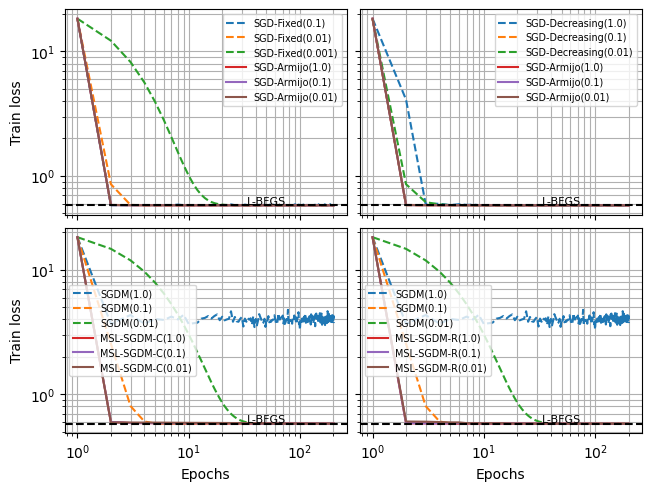

In [26]:
diagnostic_epochs(
    optim_data(sgdfixed_mush + sgdarmijo_mush),
    optim_data(sgddecre_mush + sgdarmijo_mush),
    optim_data(sgdm_mush + mslc_mush),
    optim_data(sgdm_mush + mslr_mush),
    benchMush[0])

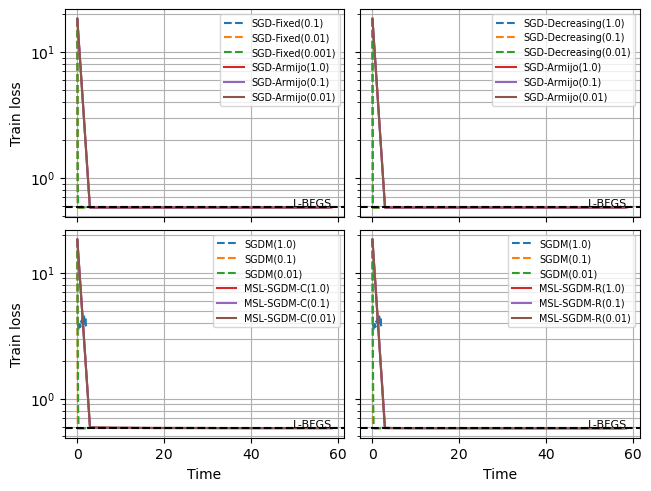

In [27]:
diagnostic_time(
    optim_data(sgdfixed_mush + sgdarmijo_mush),
    optim_data(sgddecre_mush + sgdarmijo_mush),
    optim_data(sgdm_mush + mslc_mush),
    optim_data(sgdm_mush + mslr_mush),
    benchMush[0])

# a5a

In [2]:
data_a5a = load_a5a()

X_train = (6414, 123), y_train = (6414,)
X_test = (6414, 123), y_test = (6414,)
Class distribution: {-1.0: 0.755378858746492, 1.0: 0.24462114125350795}


In [3]:
Ca5a = 1
Ma5a = 32
ka5a = 200

## Benchmark

In [4]:
bencha5a = run_bench(data_a5a, Ca5a)

bencha5a_data = optim_bench(bencha5a)

## SGD

In [5]:
# SGD-Fixed
sgdfixed_a5a = run_solvers("SGD-Fixed", Ca5a, data_a5a, ka5a, Ma5a, (0.1, 0.01, 0.001))

In [6]:
# SGD-Decreasing
sgddecre_a5a = run_solvers("SGD-Decreasing", Ca5a, data_a5a, ka5a, Ma5a, (1, 0.1, 0.01))

In [7]:
# SGDM
sgdm_a5a = run_solvers("SGDM", Ca5a, data_a5a, ka5a, Ma5a, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [8]:
# SGD-Armijo
sgdarmijo_a5a = run_solvers("SGD-Armijo", Ca5a, data_a5a, ka5a, Ma5a, (1, 0.1, 0.01))

In [9]:
# MSL-SGDM-C
mslc_a5a = run_solvers("MSL-SGDM-C", Ca5a, data_a5a, ka5a, Ma5a, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [10]:
# MSL-SGDM-R
mslr_a5a = run_solvers("MSL-SGDM-R", Ca5a, data_a5a, ka5a, Ma5a, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [11]:
modelsa5a_data = optim_data(sgdfixed_a5a + sgddecre_a5a + sgdm_a5a + sgdarmijo_a5a + mslc_a5a + mslr_a5a)

## Summary

In [12]:
models_summary(modelsa5a_data, bencha5a_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train score,Test score,Distance (L-BFGS),Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.590729,0.000026,NaN,7,0.755379,0.755379,0.000000,0.308695
0,L-BFGS,1,NaN,NaN,NaN,0.590729,0.000001,NaN,7,0.755379,0.755379,0.000000,0.308695
2,CG,1,NaN,NaN,NaN,0.590729,0.000015,NaN,10,0.755379,0.755379,0.000000,0.308695
8,SGD-Decreasing,1,32.0,0.010,0.0,0.590729,0.000051,2.032589,200,0.755379,0.755379,0.000200,0.308696
7,SGD-Decreasing,1,32.0,0.100,0.0,0.590729,0.000224,2.026448,200,0.755379,0.755379,0.000300,0.308623
5,SGD-Fixed,1,32.0,0.001,0.0,0.590729,0.000675,2.033010,200,0.755379,0.755379,0.000469,0.308479
11,SGDM,1,32.0,0.010,0.9,0.590729,0.000918,1.964540,200,0.755379,0.755379,0.000787,0.308842
10,SGDM,1,32.0,0.100,0.9,0.590737,0.004156,1.962264,200,0.755379,0.755379,0.003708,0.309162
13,SGD-Armijo,1,32.0,0.100,0.0,0.590737,0.004036,57.451569,200,0.755379,0.755379,0.003986,0.308915
6,SGD-Decreasing,1,32.0,1.000,0.0,0.590738,0.006043,2.020321,200,0.755379,0.755379,0.003253,0.306854


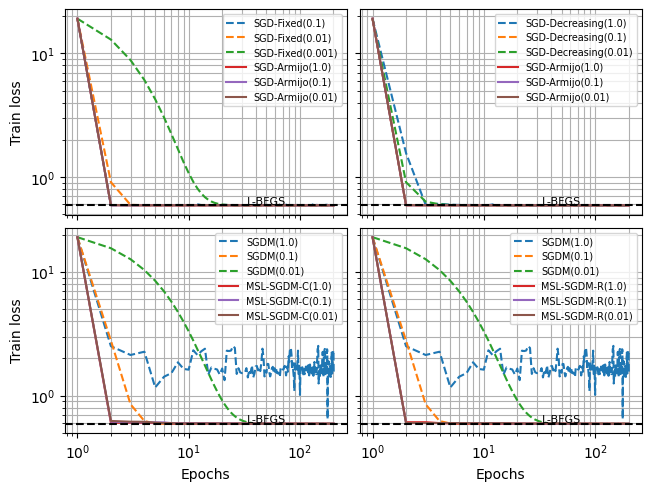

In [13]:
diagnostic_epochs(
    optim_data(sgdfixed_a5a + sgdarmijo_a5a),
    optim_data(sgddecre_a5a + sgdarmijo_a5a),
    optim_data(sgdm_a5a + mslc_a5a),
    optim_data(sgdm_a5a + mslr_a5a),
    bencha5a[0])

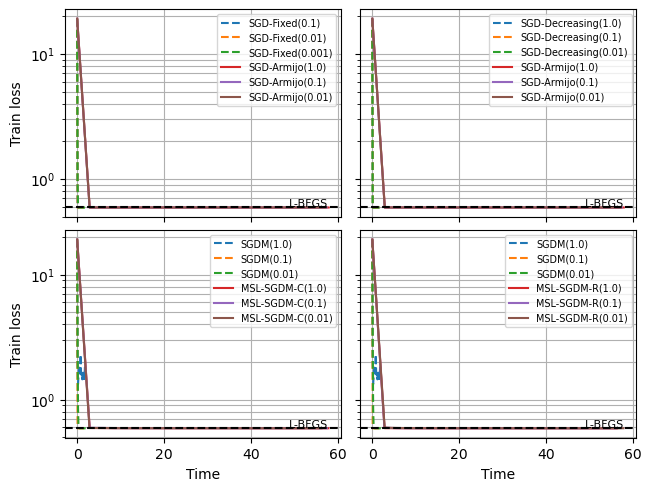

In [14]:
diagnostic_time(
    optim_data(sgdfixed_a5a + sgdarmijo_a5a),
    optim_data(sgddecre_a5a + sgdarmijo_a5a),
    optim_data(sgdm_a5a + mslc_a5a),
    optim_data(sgdm_a5a + mslr_a5a),
    bencha5a[0])